## LeNet5 model using mnist dataset

In [1]:
# import basic library
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D
from keras.models import Sequential, Model
from keras.datasets import mnist
from keras.layers import MaxPooling2D

In [2]:
# loading and splitting data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /=255.0
x_test /=255.0

In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

- it originally came in 1998 
- it is called LANET 5 because it has 5 trainable parameter
- back then tanh was used as activation function but now we use ReLU activation
- pooling concept was not there so it does not adds pooling i.e pooling=valid
- instead of avg pooling we are using max pooling 
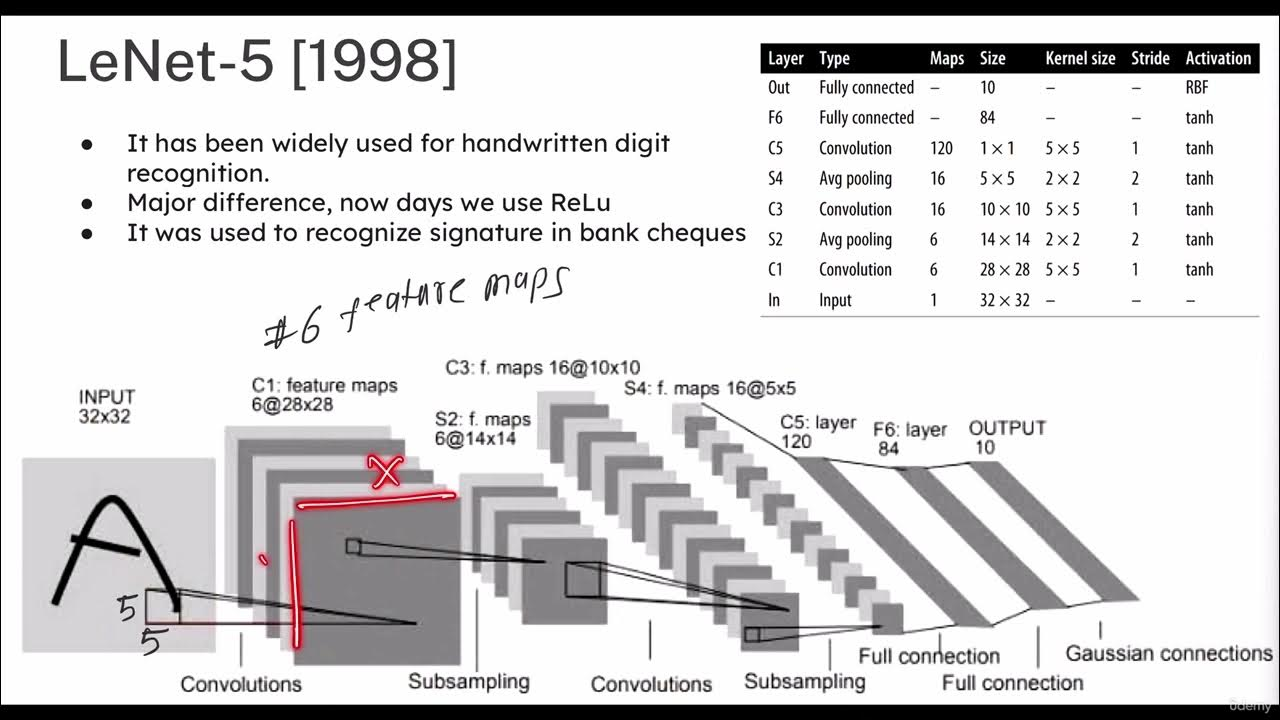

In [7]:
model = Sequential()
# conv layer 1
model.add(Conv2D(6, kernel_size=(5,5), activation='relu',strides = 1,padding='valid', input_shape=(28,28,1)))
# Avg pooling layer1- replace with MaxPooling
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
# conv layer 2
model.add(Conv2D(16, kernel_size=(5,5), activation='relu',strides = 1, padding= 'valid'))
# pooling layer2
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
# flatten
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(120, activation='relu'))
# Fully Connected Layer 2
model.add(Dense(84, activation='relu'))
# o/p layer
model.add(Dense(10, activation='softmax'))
model.summary()

/Users/nidhisingh/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(optimizer='Adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [9]:
# Fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8506 - loss: 0.4979 - val_accuracy: 0.9750 - val_loss: 0.0777
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9745 - loss: 0.0842 - val_accuracy: 0.9851 - val_loss: 0.0461
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9821 - loss: 0.0554 - val_accuracy: 0.9868 - val_loss: 0.0423
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0401 - val_accuracy: 0.9886 - val_loss: 0.0353
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9887 - loss: 0.0367 - val_accuracy: 0.9900 - val_loss: 0.0298
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.9891 - val_loss: 0.0355
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9920 - loss: 0.0225 - val_accuracy: 0.9899 - val_loss: 0.0325
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.

### using Lenet5 model on Mnist dataset gives accuracy of 99% in only 10 epoch
- since it is an image dataset so high accuracy is ok as the model must be capturing each pixel correctly